<a href="https://colab.research.google.com/github/MahmoodAhmad1/testing/blob/master/Logistic_Regression_Scracth_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000,class_sep=2,n_informative=15)


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (4000, 20)
Shape of test set is (1000, 20)
Shape of train label is (4000, 1)
Shape of test labels is (1000, 1)


In [ ]:

def sigmoid(z): 
  h = 1/(1+np.exp(-z))
  return h

def gradientDescent(x, y, theta, alpha, num_iters):
  cost_history = np.zeros(num_iters)
  m = x.shape[0]
  for i in range(0, num_iters):
      # get z, the dot product of x and theta
      z = x @ theta
      
      # get the sigmoid of z
      h = sigmoid(z)
      
      # calculate the cost function
      J = (-1./m)*(y.T @ np.log(h) + (1-y).T @ np.log(1-h))
      # update the weights theta
      theta = theta - (alpha/m)*(x.T @ (h-y))

      cost_history[i] = J
  J = float(J)
  
  return J, theta,cost_history

In [ ]:
theta = np.zeros((20,1))

J, theta,his = gradientDescent(Xtrain, ytrain, theta, 0.1, 9000)

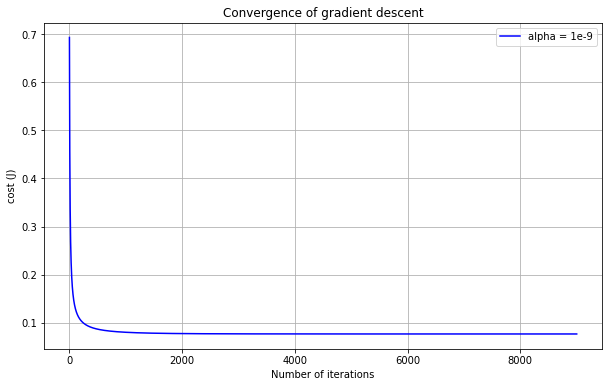

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 9000 +1), his, color ='blue',label = 'alpha = 1e-9')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")
plt.legend()

In [ ]:
y_pred = sigmoid(np.dot(Xtest,theta))
#y_pred
y_hat =[]
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)
     
accuracy = (y_hat==np.squeeze(ytest)).sum()/len(Xtest) 
print(accuracy)

0.985
